# 批数据训练

In [2]:
import torch
import torch.utils.data as Data

BATCH_SIZE = 5
x = torch.linspace(1,10,10)

y = torch.linspace(10,1,10)
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers=2,
)
    
for epoch in range(3):
    for step,(batch_x,batch_y) in enumerate(loader):
        print("Epoch: ",epoch,"| Step: ",step,"| batch x:",batch_x.numpy(),"|batch y:",batch_y.numpy())
        

Epoch:  0 | Step:  0 | batch x: [ 8.  6.  3. 10.  7.] |batch y: [3. 5. 8. 1. 4.]
Epoch:  0 | Step:  1 | batch x: [5. 2. 1. 4. 9.] |batch y: [ 6.  9. 10.  7.  2.]
Epoch:  1 | Step:  0 | batch x: [ 8. 10.  1.  5.  9.] |batch y: [ 3.  1. 10.  6.  2.]
Epoch:  1 | Step:  1 | batch x: [6. 2. 7. 3. 4.] |batch y: [5. 9. 4. 8. 7.]
Epoch:  2 | Step:  0 | batch x: [ 8.  5.  2.  3. 10.] |batch y: [3. 6. 9. 8. 1.]
Epoch:  2 | Step:  1 | batch x: [6. 1. 4. 9. 7.] |batch y: [ 5. 10.  7.  2.  4.]


# optimizer优化器

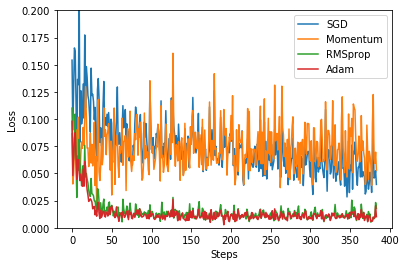

In [39]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F
%matplotlib inline
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12
# optimizer = torch.optim.SGD()
x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x


net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD,net_Momentum,net_RMSprop,net_Adam]


opt_SGD = torch.optim.SGD(net_SGD.parameters(),lr = LR)
opt_Momentum = torch.optim.SGD(net_SGD.parameters(),lr = LR,momentum=0.9)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers = [opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]]

for epoch in range(EPOCH):
    for step,(batch_x,batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            output = net(b_x)
            loss = loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data.item())

labels = ['SGD','Momentum','RMSprop','Adam']
for i,l_his in enumerate(losses_his):
    plt.plot(l_his,label = labels[i])
plt.legend(loc='best')
plt.xlabel("Steps")
plt.ylabel('Loss')
plt.ylim(0,0.2)
plt.show()
# torch.optim.
